#  **청주시 무인 악취 시스템을 이용한 데이터 분석**

### 프로젝트 개발 동기
악취란 황화수소, 메르캅탄류, 아민류 등 자극성 있는 기체상 물질이 사람의 후각을 자극하여 불쾌감과 혐오감을 주는 냄새로 심리적, 정신적 피해를 주는것 입니다.

또한 생활 수준이 올라갈수록 사람들의 악취에 대한 민감도가 높아졌습니다.

우리나라도 '악취방지법'을 2004.2.9일에 제정하여 시행하고 있으며 사업장 악취와 생활악취로 구분하고 있습니다.

청주시 산업단지 주변의 주민으로 평소 악취가 심하게 나는 시기가 언제인지 파악하고 배출허용기준에 따라 문제가 없는지 확인하고자 합니다.


### 목표
청주 공단지역 주변 주민으로서 공장에서 분출되는 냄새가 법적으로 문제가 없는지 확인하고 싶어졌습니다. (시기에 따라 심할때가 있음)

어느 월에 따라 악취가 심하게 나는지 확인

배출 기준표에 따른 악취의 농도를 비교하고 초과하는 악취물질이 있는지 확인

2019년도 자료와 2022년도 자료를 비교하여 향후 산업단지의 악취가 점점 심해지는지 예측하고자 합니다.



### 특징
 우리집 주변에서 월별 평균 복합악취 데이터 추출

 화학물질이 많이 배출되는 월과 적게 배출된는 월 추출

 센서별 년 평균 화학물질값을 계산하여 어느 지역이 많이 배출 되는지 확인 가능합니다.

 배출 기준표와 비교하여 배출기준표를 넘은 물질과 어느 월에 초과수가 많은지 확인 가능합니다.

 2019년도와 2022년도의 값을 비교하여 향후 화학물질 및 악취의 농도를 예측할 수 있습니다.

## 1. 데이터 불러오기

### 1.1 코랩을 이용한 구글드라이브 연동 및 폰트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 구글 코랩에서 한글 폰트를 설치
# 실행후 세션 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'NanumBarunGothic'

### 1.2 데이터 파일 불러오고 확인

*   2019년 파일과 2022년 파일의 컬럼의 데이터 타입이 다른 것을 확인

In [ ]:
smoke_2019=pd.read_csv("/content/drive/MyDrive/project/smoke 2019.csv", encoding='utf-8')
smoke_2022=pd.read_csv("/content/drive/MyDrive/project/smoke 2022.csv", encoding='utf-8')

In [ ]:
smoke_2019.head()

,HQL,센서명,수신일시,복합악취,황화수소,암모니아,휘발성유기물,에탄올,트리메틸아민,메틸메르캅탄,염소,미세먼지10,미세먼지2_5,황산화물,질소산화물
0,고정식,환경사업소 입구(431130204),2019-01-01 7:00,6.851,0.089,0.202,0.091,0.01,0.044,0.017,0.022,22,36,0.207,0.217
1,고정식,환경사업소 입구(431130204),2019-01-01 7:10,5.977,0.089,0.203,0.091,0.007,0.042,0.013,0.011,27,47,0.198,0.217
2,고정식,환경사업소 입구(431130204),2019-01-01 7:20,6.024,0.09,0.202,0.091,0.007,0.042,0.014,0.012,25,44,0.194,0.218
3,고정식,환경사업소 입구(431130204),2019-01-01 7:30,6.065,0.09,0.202,0.091,0.008,0.042,0.014,0.014,24,41,0.198,0.217
4,고정식,환경사업소 입구(431130204),2019-01-01 7:40,6.151,0.09,0.202,0.091,0.008,0.042,0.015,0.015,23,38,0.198,0.217


In [ ]:
smoke_2022.head()

,HQL,센서명,수신일시,복합악취,황화수소,암모니아,휘발성유기물,에탄올,트리메틸아민,메틸메르캅탄,염소,미세먼지2_5,미세먼지10,황산화물,질소산화물
0,고정식,SK 바이오 랜드입구,2022-01-01 00:00,3,0.092,0.098,0.058,0.005,0.022,0.008,0.013,0.0,0.0,0.101,0.096
1,고정식,SK 바이오 랜드입구,2022-01-01 00:10,3,0.092,0.098,0.058,0.005,0.023,0.008,0.014,0.0,0.0,0.101,0.097
2,고정식,SK 바이오 랜드입구,2022-01-01 00:20,3,0.093,0.098,0.059,0.005,0.024,0.008,0.015,0.0,0.0,0.100,0.096
3,고정식,SK 바이오 랜드입구,2022-01-01 00:30,3,0.092,0.098,0.058,0.005,0.024,0.008,0.013,0.0,0.0,0.100,0.097
4,고정식,SK 바이오 랜드입구,2022-01-01 00:40,3,0.092,0.099,0.058,0.005,0.024,0.009,0.014,0.0,0.0,0.101,0.097


In [ ]:
smoke_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326772 entries, 0 to 326771
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   HQL      326772 non-null  object
 1   센서명      326772 non-null  object
 2   수신일시     326772 non-null  object
 3   복합악취     326772 non-null  object
 4   황화수소     326772 non-null  object
 5   암모니아     326772 non-null  object
 6   휘발성유기물   326772 non-null  object
 7   에탄올      326772 non-null  object
 8   트리메틸아민   326772 non-null  object
 9   메틸메르캅탄   326772 non-null  object
 10  염소       326772 non-null  object
 11  미세먼지10   326772 non-null  object
 12  미세먼지2_5  326772 non-null  object
 13  황산화물     326772 non-null  object
 14  질소산화물    326772 non-null  object
dtypes: object(15)
memory usage: 37.4+ MB


In [ ]:
smoke_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615118 entries, 0 to 615117
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   HQL      615118 non-null  object 
 1   센서명      615118 non-null  object 
 2   수신일시     615118 non-null  object 
 3   복합악취     615118 non-null  int64  
 4   황화수소     615118 non-null  float64
 5   암모니아     615118 non-null  float64
 6   휘발성유기물   615118 non-null  float64
 7   에탄올      615118 non-null  float64
 8   트리메틸아민   615118 non-null  float64
 9   메틸메르캅탄   615118 non-null  float64
 10  염소       615118 non-null  float64
 11  미세먼지2_5  615118 non-null  float64
 12  미세먼지10   615118 non-null  float64
 13  황산화물     615118 non-null  float64
 14  질소산화물    615118 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 70.4+ MB


# 2. 데이터 정제  

### 2.1. 데이터 형 변환

*   2022년도 데이터와 2019년도 데이터의 타입이 다름
*   데이터 형 : object → float64




In [ ]:
# '복합악취', '황화수소', '암모니아', '트리메틸아민' 컬럼을 숫자형으로 변환
smoke_2019['복합악취'] = pd.to_numeric(smoke_2019['복합악취'], errors='coerce')
smoke_2019['황화수소'] = pd.to_numeric(smoke_2019['황화수소'], errors='coerce')
smoke_2019['암모니아'] = pd.to_numeric(smoke_2019['암모니아'], errors='coerce')
smoke_2019['트리메틸아민'] = pd.to_numeric(smoke_2019['트리메틸아민'], errors='coerce')
smoke_2019['메틸메르캅탄'] = pd.to_numeric(smoke_2019['메틸메르캅탄'], errors='coerce')

###  2.2. 데이터셋 결측치 삭제

#### 2.2.1. 2019년도 데이터
*   데이터값이 없는 인덱수의 수 : 11473

In [ ]:
smoke_del_2019 = smoke_2019.drop(columns = ['HQL', '휘발성유기물', '에탄올', '염소', '미세먼지2_5', '미세먼지10', '황산화물', '질소산화물'])

In [ ]:
columns_to_check = ['복합악취', '황화수소', '암모니아', '트리메틸아민', '메틸메르캅탄']  # 검사할 컬럼 이름을 여기에 넣으세요

# 숫자가 아닌 값이 포함된 행을 찾는 함수
def is_not_numeric(x):
    try:
        float(x)
        return False
    except ValueError:
        return True

# 모든 지정된 컬럼에서 숫자가 아닌 값을 갖는 인덱스 찾기
null_count = smoke_del_2019[smoke_del_2019[columns_to_check].applymap(is_not_numeric).any(axis=1)].shape[0]

print(f"지정된 컬럼에서 숫자가 아닌 값을 갖는 인덱스 수: {null_count}")


지정된 컬럼에서 숫자가 아닌 값을 갖는 인덱스 수: 0


In [ ]:
# 해당 인덱스 삭제
smoke_del_null_2019 = smoke_del_2019[~smoke_del_2019[columns_to_check].applymap(is_not_numeric).any(axis=1)]

In [ ]:
smoke_del_null_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326772 entries, 0 to 326771
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   센서명     326772 non-null  object 
 1   수신일시    326772 non-null  object 
 2   복합악취    315299 non-null  float64
 3   황화수소    315299 non-null  float64
 4   암모니아    315299 non-null  float64
 5   트리메틸아민  315299 non-null  float64
 6   메틸메르캅탄  315299 non-null  float64
dtypes: float64(5), object(2)
memory usage: 17.5+ MB


#### 2.2.2. 2022년도 데이터
*   데이터값이 없는 인덱수의 수 : 0

In [ ]:
smoke_del_2022 = smoke_2022.drop(columns = ['HQL', '휘발성유기물', '에탄올', '염소', '미세먼지2_5', '미세먼지10', '황산화물', '질소산화물'])

In [ ]:
columns_to_check = ['복합악취', '황화수소', '암모니아', '트리메틸아민', '메틸메르캅탄']

# 숫자가 아닌 값이 포함된 행을 찾는 함수
def is_not_numeric(x):
    try:
        float(x)
        return False
    except ValueError:
        return True

# 모든 지정된 컬럼에서 숫자가 아닌 값을 갖는 인덱스 찾기
null_count = smoke_del_2022[smoke_del_2022[columns_to_check].applymap(is_not_numeric).any(axis=1)].shape[0]

print(f"지정된 컬럼에서 숫자가 아닌 값을 갖는 인덱스 수: {null_count}")

지정된 컬럼에서 숫자가 아닌 값을 갖는 인덱스 수: 0


In [ ]:
# 해당 인덱스 삭제
smoke_del_null_2022 = smoke_del_2022[~smoke_del_2022[columns_to_check].applymap(is_not_numeric).any(axis=1)]

In [ ]:
smoke_del_null_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615118 entries, 0 to 615117
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   센서명     615118 non-null  object 
 1   수신일시    615118 non-null  object 
 2   복합악취    615118 non-null  int64  
 3   황화수소    615118 non-null  float64
 4   암모니아    615118 non-null  float64
 5   트리메틸아민  615118 non-null  float64
 6   메틸메르캅탄  615118 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 32.9+ MB


### 2.3 수신일시 날짜 및 시간 데이터 정제
*   수신일 데이터를 출력해보면 년, 월, 일, 시:분 [2019-01-01 00:00] 형태의 날짜시간 형식임을 알 수 있음
*   월, 일, 시간 분석을 위해 날짜 데이터로 변환 필요

#### 2.3.1 2019년도 데이터

In [ ]:
smoke_del_null_2019 = smoke_del_null_2019.copy()

# 2019년
smoke_del_null_2019['수신일시'] = pd.to_datetime(smoke_del_null_2019['수신일시'])

# 월, 일, 시간 컬럼 추가
smoke_del_null_2019['month'] = smoke_del_null_2019['수신일시'].dt.month
smoke_del_null_2019['day'] = smoke_del_null_2019['수신일시'].dt.day
smoke_del_null_2019['hour'] = smoke_del_null_2019['수신일시'].dt.hour

# 데이터 타입 변환
smoke_del_null_2019['month'] = smoke_del_null_2019['month'].astype('int64')
smoke_del_null_2019['day'] = smoke_del_null_2019['day'].astype('int64')
smoke_del_null_2019['hour'] = smoke_del_null_2019['hour'].astype('int64')

print(smoke_del_null_2019)
print('month', smoke_del_null_2019['month'].dtype)


                        센서명                수신일시   복합악취   황화수소   암모니아  트리메틸아민  \
0       환경사업소 입구(431130204) 2019-01-01 07:00:00  6.851  0.089  0.202   0.044   
1       환경사업소 입구(431130204) 2019-01-01 07:10:00  5.977  0.089  0.203   0.042   
2       환경사업소 입구(431130204) 2019-01-01 07:20:00  6.024  0.090  0.202   0.042   
3       환경사업소 입구(431130204) 2019-01-01 07:30:00  6.065  0.090  0.202   0.042   
4       환경사업소 입구(431130204) 2019-01-01 07:40:00  6.151  0.090  0.202   0.042   
...                     ...                 ...    ...    ...    ...     ...   
326767     입상사거리(431140215) 2019-09-20 10:10:00  2.000  0.102  0.093   0.003   
326768     입상사거리(431140215) 2019-09-20 10:20:00  2.000  0.102  0.092   0.002   
326769     입상사거리(431140215) 2019-09-20 10:30:00  2.000  0.101  0.092   0.002   
326770     입상사거리(431140215) 2019-09-20 10:40:00  2.000  0.102  0.092   0.002   
326771     입상사거리(431140215) 2019-09-20 10:50:00  2.000  0.102  0.092   0.002   

        메틸메르캅탄  month  day  hour  
0   

#### 2.3.2 2022년도 데이터

In [ ]:
# 2022년
smoke_del_null_2022['수신일시'] = pd.to_datetime(smoke_del_null_2022['수신일시'])

# 월, 일, 시간 컬럼 추가
smoke_del_null_2022['month'] = smoke_del_null_2022['수신일시'].dt.month
smoke_del_null_2022['day'] = smoke_del_null_2022['수신일시'].dt.day
smoke_del_null_2022['hour'] = smoke_del_null_2022['수신일시'].dt.hour

# 데이터 타입 변환
smoke_del_null_2022['month'] = smoke_del_null_2022['month'].astype('int64')
smoke_del_null_2022['day'] = smoke_del_null_2022['day'].astype('int64')
smoke_del_null_2022['hour'] = smoke_del_null_2022['hour'].astype('int64')

print(smoke_del_null_2022)
print('month', smoke_del_null_2022['month'].dtype)

                센서명                수신일시  복합악취   황화수소   암모니아  트리메틸아민  메틸메르캅탄  \
0       SK 바이오 랜드입구 2022-01-01 00:00:00     3  0.092  0.098   0.022   0.008   
1       SK 바이오 랜드입구 2022-01-01 00:10:00     3  0.092  0.098   0.023   0.008   
2       SK 바이오 랜드입구 2022-01-01 00:20:00     3  0.093  0.098   0.024   0.008   
3       SK 바이오 랜드입구 2022-01-01 00:30:00     3  0.092  0.098   0.024   0.008   
4       SK 바이오 랜드입구 2022-01-01 00:40:00     3  0.092  0.099   0.024   0.009   
...             ...                 ...   ...    ...    ...     ...     ...   
615113     환경사업소 입구 2022-10-27 12:50:00     4  0.077  0.185   0.001   0.001   
615114     환경사업소 입구 2022-10-27 13:00:00     4  0.076  0.181   0.001   0.001   
615115     환경사업소 입구 2022-10-27 13:10:00     4  0.076  0.182   0.001   0.001   
615116     환경사업소 입구 2022-10-27 13:20:00     4  0.076  0.185   0.001   0.001   
615117     환경사업소 입구 2022-10-27 13:30:00     4  0.076  0.185   0.001   0.001   

        month  day  hour  
0           1    1     0

# 3. 데이터 분석

### 3.1. 우리집 주변 센서명(환경사업소 입구)에서 월별 평균 복합악취 데이터 추출

*   종합적으로 봤을 때 겨울이 복합악취가 심하게 나며 여름에 냄새가 적게 나는 것을 확인할 수 있음
*   2022년의 경우 2019보다 트리메틸아민이 늘어난 것을 확인 할 수 있음



#### 3.1.1. 2019년 데이터 분석

In [ ]:
#2019
# 특정 센서명 필터링
sensor_name_19 = '환경사업소 입구(431130204)'
sensor_month_19 = smoke_del_null_2019[smoke_del_null_2019['센서명'] == sensor_name_19]

# 월별 평균 화학물질값
list = ['복합악취', '황화수소', '암모니아', '트리메틸아민', '메틸메르캅탄']
sensor_month_avg_19 = sensor_month_19.groupby('month')[list].mean().reset_index()

# 결과 데이터 프레임
sensor_month_avg_19_df = pd.DataFrame(sensor_month_avg_19)
sensor_month_avg_19_df_1 = sensor_month_avg_19_df.set_index('month')
sensor_month_avg_19_df_1

,복합악취,황화수소,암모니아,트리메틸아민,메틸메르캅탄
month,,,,,
1,4.637553,0.088631,0.200911,0.035044,0.010084
2,3.539537,0.088537,0.201512,0.035293,0.008122
3,3.628354,0.085729,0.198419,0.025855,0.005848
4,3.201389,0.083403,0.196014,0.017542,0.003806
5,3.642362,0.082549,0.195510,0.017835,0.003596
6,3.000000,0.081289,0.191056,0.003489,0.001322
7,3.368794,0.081904,0.193067,0.010275,0.002205
8,3.042735,0.081167,0.191218,0.006927,0.002355
9,3.485878,0.081001,0.192139,0.007097,0.001954


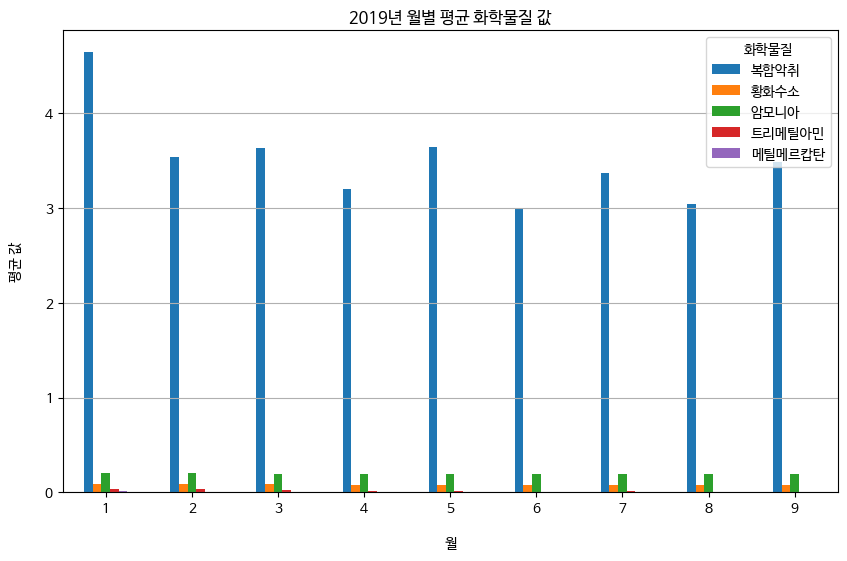

In [ ]:
# 막대그래프 그리기
sensor_month_avg_19_df_1.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('2019년 월별 평균 화학물질 값')
plt.xticks(rotation=0)
plt.xlabel('월', labelpad=15)
plt.ylabel('평균 값', labelpad=15)
plt.legend(title='화학물질')
plt.grid(axis='y')

*   복합악취의 경우 1월이 가장 심하며 6월이 냄새가 가장 적게 나는 것을 확인할 수 있음
*   황화수소, 암모니아의 경우 매월 비슷한 수치를 보임
*   트리메틸아민의 경우 6,8,9월에는 거의 값이 희미한것을 알 수 있음
*   메틸메르캅탄의 경우 6,8,9월에는 거의 값이 희미한것을 알 수 있음



#### 3.1.2. 2022년 데이터 분석

In [ ]:
#2022
# 특정 센서명 필터링
sensor_name_22 = '환경사업소 입구'
sensor_month_22 = smoke_del_null_2022[smoke_del_null_2022['센서명'] == sensor_name_22]

# 월별 평균 화학물질값
list = ['복합악취', '황화수소', '암모니아', '트리메틸아민', '메틸메르캅탄']
sensor_month_avg_22 = sensor_month_22.groupby('month')[list].mean().reset_index()

# 결과 데이터 프레임
sensor_month_avg_22_df = pd.DataFrame(sensor_month_avg_22)
sensor_month_avg_22_df_1 = sensor_month_avg_22_df.set_index('month')
sensor_month_avg_22_df_1

,복합악취,황화수소,암모니아,트리메틸아민,메틸메르캅탄
month,,,,,
1,4.721976,0.086225,0.199838,0.031678,0.007667
2,4.095084,0.085035,0.199029,0.028535,0.005673
3,4.173979,0.083120,0.199380,0.030441,0.004240
4,3.874212,0.080132,0.196085,0.022794,0.002288
5,3.646505,0.078430,0.194252,0.020308,0.001690
6,3.521296,0.077239,0.194336,0.017304,0.001278
7,3.359319,0.076846,0.194444,0.016816,0.001268
8,3.163754,0.077524,0.194215,0.015431,0.001359
9,3.674279,0.079564,0.194367,0.017530,0.002525


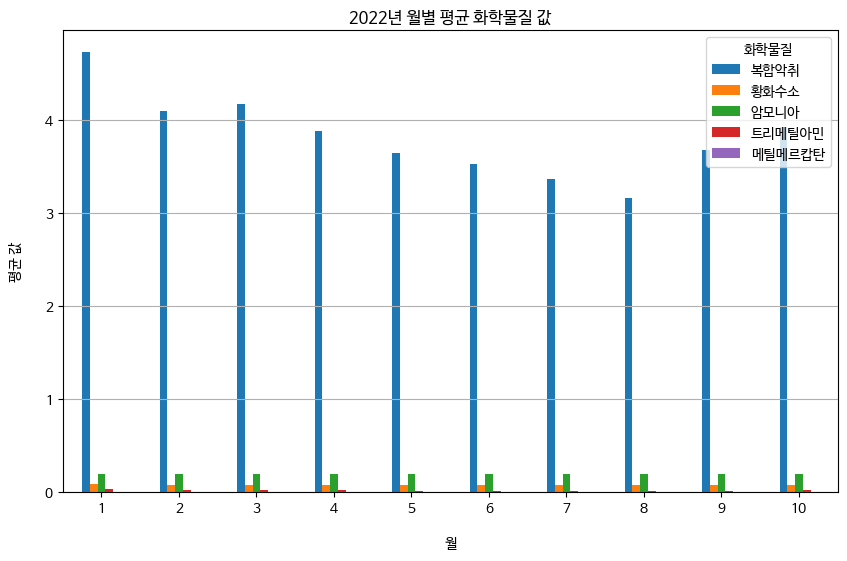

In [ ]:
# 막대그래프 그리기
sensor_month_avg_22_df_1.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('2022년 월별 평균 화학물질 값')
plt.xticks(rotation=0)
plt.xlabel('월', labelpad=15)
plt.ylabel('평균 값', labelpad=15)

plt.legend(title='화학물질')
plt.grid(axis='y')

*   복합악취의 경우 1월이 가장 심하며 8월이 냄새가 가장 적게 나는 것을 확인할 수 있음
*   황화수소, 암모니아, 트리메틸아민, 메틸메르캅탄의 경우 매월 비슷한 수치를 보임

#### 3.1.3 2022년도 우리집 주변에서 악취가 심하게 나는 월과 적게나는 월

In [ ]:
# 결과 데이터 프레임 설정
sensor_month_avg_22_df = pd.DataFrame(sensor_month_avg_22)
sensor_month_avg_22_df = sensor_month_avg_22_df.set_index('month')

# 화학물질별로 가장 큰 값과 가장 작은 값 찾기
results = {}
for chemical in list:
    # 최대값과 최소값 찾기
    max_value = sensor_month_avg_22_df[chemical].max()
    min_value = sensor_month_avg_22_df[chemical].min()

    # 최대값과 최소값의 월 찾기
    max_month = sensor_month_avg_22_df[sensor_month_avg_22_df[chemical] == max_value].index[0]
    min_month = sensor_month_avg_22_df[sensor_month_avg_22_df[chemical] == min_value].index[0]

    # 결과 저장
    results[chemical] = {
        '최대값': max_value,
        '최대 월': max_month,
        '최소값': min_value,
        '최소 월': min_month
    }

# 결과 출력
results_df = pd.DataFrame(results).T
results_df

,최대값,최대 월,최소값,최소 월
복합악취,4.721976,1.0,3.163754,8.0
황화수소,0.086225,1.0,0.076846,7.0
암모니아,0.199838,1.0,0.194215,8.0
트리메틸아민,0.031678,1.0,0.015431,8.0
메틸메르캅탄,0.007667,1.0,0.001268,7.0




*   겨울에 악취가 심하며 화학물질이 많이 나옴
*   겨울보단 여름에 악취와 화학물질이 덜 나옴



### 3.2. 2022년도 센서명별 화학물질 평균값

In [ ]:
smoke_name_avg_22 =smoke_del_2022.groupby('센서명').agg({
    '복합악취': 'mean',
    '황화수소': 'mean',
    '암모니아': 'mean',
    '트리메틸아민': 'mean',
    '메틸메르캅탄' : 'mean'
}).reset_index()
smoke_name_avg_22_df = pd.DataFrame(smoke_name_avg_22)
smoke_name_avg_22_df = smoke_name_avg_22_df.set_index('센서명')
smoke_name_avg_22_df


,복합악취,황화수소,암모니아,트리메틸아민,메틸메르캅탄
센서명,,,,,
SK 바이오 랜드입구,3.429302,0.081874,0.088544,0.006734,0.002120
기아모터스,2.829265,0.097509,0.103056,0.014964,0.003936
미래나노텍 입구 맞은편,3.738842,0.096057,0.098446,0.015709,0.003250
사거리 백산린텍스 앞,3.929641,0.096143,0.087075,0.025261,0.014519
삼성 SDI 맞은편 언덕,2.988174,0.075278,0.108995,0.034561,0.008919
스탬코 입구 앞,2.693433,0.080727,0.081611,0.010129,0.003693
오창 청원구 보건소,2.251223,0.102695,0.104739,0.010728,0.004811
오창 수변옆 대로 길,2.386342,0.081246,0.086999,0.017650,0.003763
오창대 교회 맞은편,2.508645,0.079156,0.081721,0.003618,0.002570


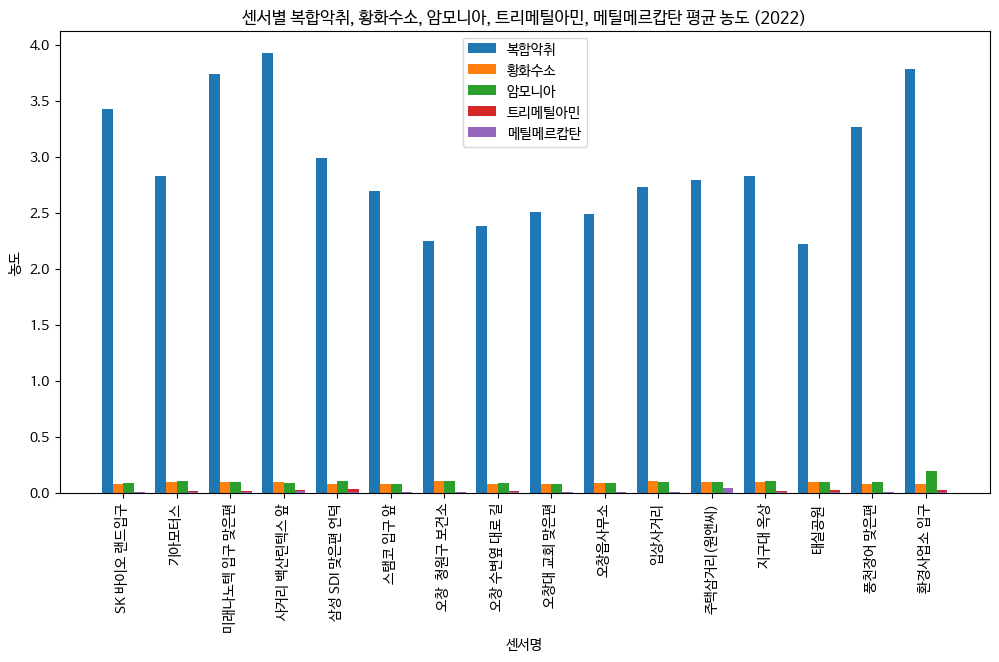

In [ ]:
# Plotting
sensors = smoke_name_avg_22_df.index
composite_odors = smoke_name_avg_22_df['복합악취']
hydrogen_sulfide = smoke_name_avg_22_df['황화수소']
ammonia = smoke_name_avg_22_df['암모니아']
trimethylamine = smoke_name_avg_22_df['트리메틸아민']
metil = smoke_name_avg_22_df['메틸메르캅탄']


x = np.arange(len(sensors))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, composite_odors, width, label='복합악취')
bar2 = ax.bar(x - 0.5*width, hydrogen_sulfide, width, label='황화수소')
bar3 = ax.bar(x + 0.5*width, ammonia, width, label='암모니아')
bar4 = ax.bar(x + 1.5*width, trimethylamine, width, label='트리메틸아민')
bar5 = ax.bar(x + 1.5*width, metil, width, label='메틸메르캅탄')

# Adding labels and title
ax.set_xlabel('센서명')
ax.set_ylabel('농도')
ax.set_title('센서별 복합악취, 황화수소, 암모니아, 트리메틸아민, 메틸메르캅탄 평균 농도 (2022)')
ax.set_xticks(x)
ax.set_xticklabels(sensors, rotation=90)
ax.legend()

plt.show()

*   대체적으로 오창 산업단지 부분에서 악취가 가장 많이 났으며 주거지역에서는 악취가 상대적으로 적게 나는 것을 확인 할 수 있음

### 3.3. 배출 허용 기준에 따른 초과된 데이터의 양 측정

#### 3.3.1. 배출 허용 기준 값
  - 참고 : 악취방지법 시행 규칙 [별표 2] <개정 2011.2.1>

   <지정 악취물>

    암모니아 : 2

    황화수소 : 0.06
    
    트리메틸아민 : 0.02

    메틸메르캅탄 : 0.004

#### 3.3.2. 2022년도 자료를 기반으로 배출허용기준을 초과하는 데이터의 값

In [ ]:
# 배출 허용 기준
limits = {
    '암모니아': 2,
    '황화수소': 0.06,
    '트리메틸아민': 0.02,
    '메틸메르캅탄' : 0.004
}

# 초과 기준 비교
exceedances = []
for index, row in sensor_month_22.iterrows():
    if row['암모니아'] > limits['암모니아']:
        exceedances.append((row['센서명'], row['수신일시'], '암모니아', row['암모니아']))
    if row['황화수소'] > limits['황화수소']:
        exceedances.append((row['센서명'], row['수신일시'], '황화수소', row['황화수소']))
    if row['트리메틸아민'] > limits['트리메틸아민']:
        exceedances.append((row['센서명'], row['수신일시'], '트리메틸아민', row['트리메틸아민']))
    if row['메틸메르캅탄'] > limits['메틸메르캅탄']:
        exceedances.append((row['센서명'], row['수신일시'], '메틸메르캅탄', row['메틸메르캅탄']))

exceedances_22_df = pd.DataFrame(exceedances, columns=['센서명', '수신일시', '화학물질', '측정값'])
exceedances_22_df

,센서명,수신일시,화학물질,측정값
0,환경사업소 입구,2022-01-01 00:00:00,황화수소,0.088
1,환경사업소 입구,2022-01-01 00:00:00,트리메틸아민,0.037
2,환경사업소 입구,2022-01-01 00:00:00,메틸메르캅탄,0.009
3,환경사업소 입구,2022-01-01 00:10:00,황화수소,0.089
4,환경사업소 입구,2022-01-01 00:10:00,트리메틸아민,0.038
...,...,...,...,...
70674,환경사업소 입구,2022-10-27 12:50:00,황화수소,0.077
70675,환경사업소 입구,2022-10-27 13:00:00,황화수소,0.076
70676,환경사업소 입구,2022-10-27 13:10:00,황화수소,0.076
70677,환경사업소 입구,2022-10-27 13:20:00,황화수소,0.076


#### 3.3.3. 전체적인 초과 횟수 : 70679
*   전체적인 화학물질을 토대로 데이터를 수치화 하여 수신일시가 중복이 될 수도 있음



In [ ]:
exceedance_count_22 = len(exceedances)
exceedance_count_22 # 초과 횟수 토탈

70679

#### 3.3.4. 초과된 화학물질 목록
*   총 4가지 물질 중 메틸메르캅탄, 트리메틸아민, 황화수소가 기준치 초과된 물질로 확인 함



In [ ]:
# 초과된 화학물질 목록 추출
exceeded_chemicals_set = set(exceedances_22_df['화학물질'])

# 결과 출력
print("초과된 화학물질 목록:", exceeded_chemicals_set)

초과된 화학물질 목록: {'메틸메르캅탄', '황화수소', '트리메틸아민'}


#### 3.3.5. 월별 초과 횟수 꺽은선 그래프

*   초과 횟수가 최대인 달 : 1월
*   초과 횟수가 최소인 달 : 3월



In [ ]:
# 수신일시를 datetime 타입으로 변환
exceedances_22_df['수신일시'] = pd.to_datetime(exceedances_22_df['수신일시'])

# 월별 초과 횟수 집계
monthly_exceedances = exceedances_22_df.resample('M', on='수신일시').size()

# 월별 초과 횟수를 데이터프레임으로 변환
monthly_exceedances_df = monthly_exceedances.reset_index(name='초과 횟수')
monthly_exceedances_df.columns = ['날짜', '초과 횟수']


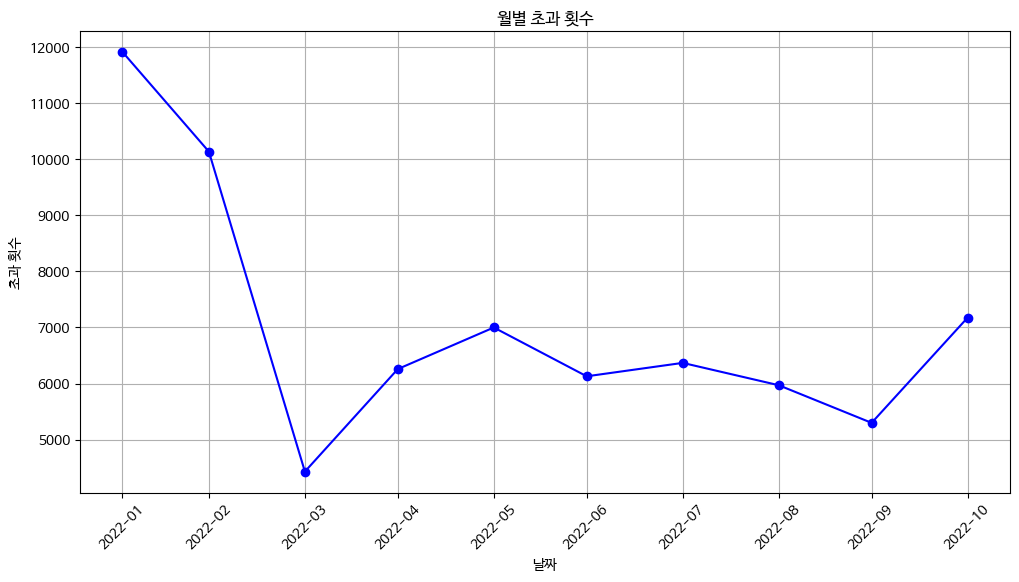

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(monthly_exceedances_df['날짜'], monthly_exceedances_df['초과 횟수'], marker='o', linestyle='-', color='b')

# 그래프 제목 및 축 레이블 설정
plt.title('월별 초과 횟수')
plt.xlabel('날짜')
plt.ylabel('초과 횟수')

adjusted_dates = monthly_exceedances_df['날짜']

# X축 레이블 설정
plt.xticks(ticks=monthly_exceedances_df['날짜'], labels=adjusted_dates.apply(lambda x: x.strftime('%Y-%m')), rotation=45)

# 그래프 표시
plt.grid(True)
plt.show()

### 3.4. 2019년 데이터 VS 2022년 데이터 비교


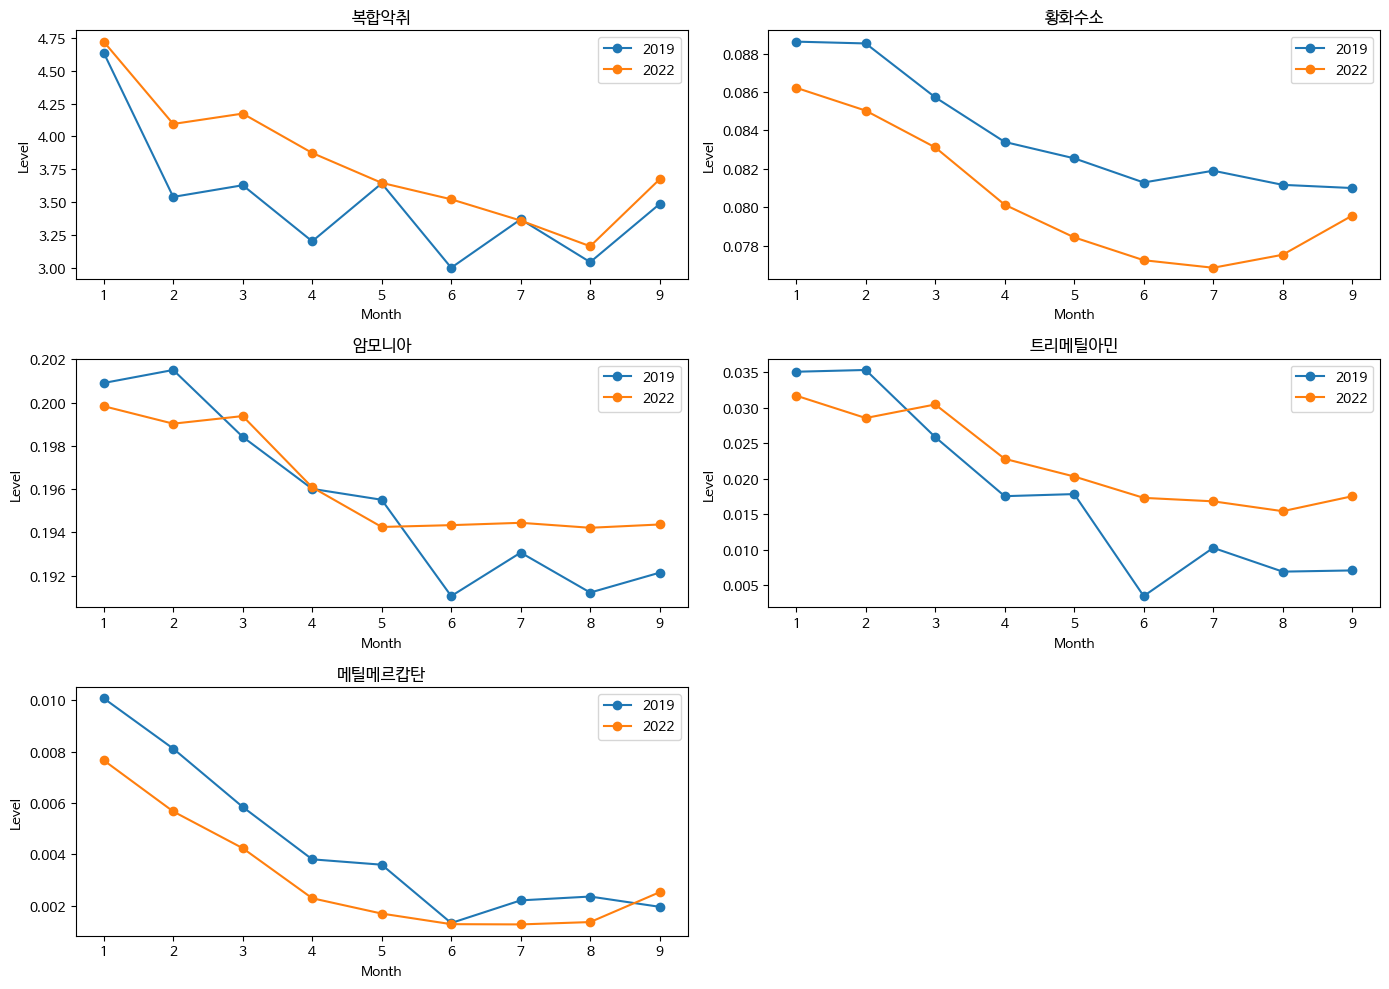

In [ ]:
# 2022년 10월 데이터 지우기
data_2022 = {key: value[:9] for key, value in sensor_month_avg_22_df.items()}

df_2019 = pd.DataFrame(sensor_month_avg_19_df).set_index('month')
df_2022 = pd.DataFrame(data_2022)

plt.figure(figsize=(14, 10))

# 복합악취
plt.subplot(3, 2, 1)
plt.plot(df_2019.index, df_2019['복합악취'], marker='o', label='2019')
plt.plot(df_2022.index, df_2022['복합악취'], marker='o', label='2022')
plt.title('복합악취')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()

# 황화수소
plt.subplot(3, 2, 2)
plt.plot(df_2019.index, df_2019['황화수소'], marker='o', label='2019')
plt.plot(df_2022.index, df_2022['황화수소'], marker='o', label='2022')
plt.title('황화수소')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()

# 암모니아
plt.subplot(3, 2, 3)
plt.plot(df_2019.index, df_2019['암모니아'], marker='o', label='2019')
plt.plot(df_2022.index, df_2022['암모니아'], marker='o', label='2022')
plt.title('암모니아')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()

# 트리메틸아민
plt.subplot(3, 2, 4)
plt.plot(df_2019.index, df_2019['트리메틸아민'], marker='o', label='2019')
plt.plot(df_2022.index, df_2022['트리메틸아민'], marker='o', label='2022')
plt.title('트리메틸아민')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()

# 메틸메르캅탄
plt.subplot(3, 2, 5)
plt.plot(df_2019.index, df_2019['메틸메르캅탄'], marker='o', label='2019')
plt.plot(df_2022.index, df_2022['메틸메르캅탄'], marker='o', label='2022')
plt.title('메틸메르캅탄')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()

plt.tight_layout()
plt.show()

1.  복합악취

  - 2022년도가 2019년도 보다 확연히 높다는 것을 알 수 있음

2.  황화수소

  - 2019년도가 2022년도 수치보다 적게 나옴

  - 황화수소는 복합악취에 특별한 영향을 미치지 않는 것으로 판명

3.  암모니아

  - 2019년도에 5월 이후로 현저히 줄었음

  - 2022년도에는 3월과 6,7,8,9월이 2019년도보다 높게 나옴

4. 트리메틸아민

   - 1,2월에는 2019년도보다 2022년도가 적게 나왔으며 그 이후에는 꾸준이 높게 나옴

5. 메틸메르캅탄

  - 2022년도가 2019년도보다 전체적으로 값이 줄다가 9월에 갑자기 올라감

# 4. 결론

복합악취의 경우 가장 높은달과 적은달의 차가 대략 1.6 정도로 냄새가 특정하게 냄새가 심한 달이 있다는 것을 알 수 있었다.
센서별 복합악취 및 화학물질의 평균 농도를 구한 결과 주 산업단지 부분에서는 높게 나왔으며 그나마 주거단지 부분은 적게 측정되는 것으로 파악이 되었다.
주요 악취 원인인 황화수소, 암모니아, 트리메틸아민, 메틸메르캅탄을 배출기준표에 의한 분석 결과 황화수소, 트리메틸아민, 메틸메르캅탄의 기준치보다 높게 나왔으며 내가 느낀 악취가 전혀 근거가 없이 나는 냄새가 아니라는 것을 파악하게 되었다.
분석 결과 겨울철 악취가 더 심하게 나며 겨울철에는 마스크를 이용하여 화학물질에 대비를 해야 될 것 같다.
2019년도와 2022년도의 화학물질의 배출 농도를 비교한 결과 2019년도보다 대체적으로 높아졌으며 산업단지가 발달 될 수록 화학물질이 많이 배출 될 것으로 향후 예상이 되며 청주시에서는 대책방안을 마련해야 된다고 결론을 지었다.
